### https://data.kma.go.kr/cmmn/main.do -> 기후통계분석 -> 통계분석 -> 기온분석
- 19960920 ~ 
- 서울

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font',family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('ta_20211110171949.csv', encoding='cp949',skiprows=6) # 이상한 행 스킵하기
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1996-09-20,108,20.5,16.7,25.1
1,1996-09-21,108,18.6,11.6,25.6
2,1996-09-22,108,19.4,12.8,26.4
3,1996-09-23,108,21.3,16.4,27.0
4,1996-09-24,108,22.9,19.9,27.1
...,...,...,...,...,...
9177,2021-11-05,108,13.0,7.8,20.2
9178,2021-11-06,108,14.1,8.8,21.3
9179,2021-11-07,108,15.3,9.7,21.3
9180,2021-11-08,108,8.6,4.5,15.5


<AxesSubplot:>

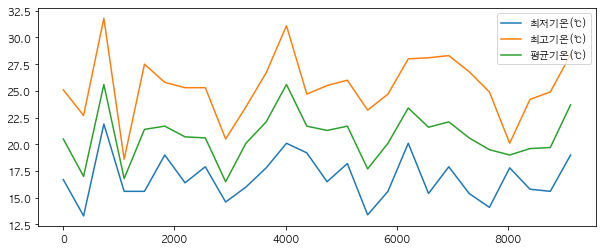

In [12]:
birth = df[df['날짜'].str.contains('-09-20')]
birth = birth[birth['평균기온(℃)'].notnull()]
birth[['최저기온(℃)','최고기온(℃)','평균기온(℃)']].plot(figsize=(10,4))

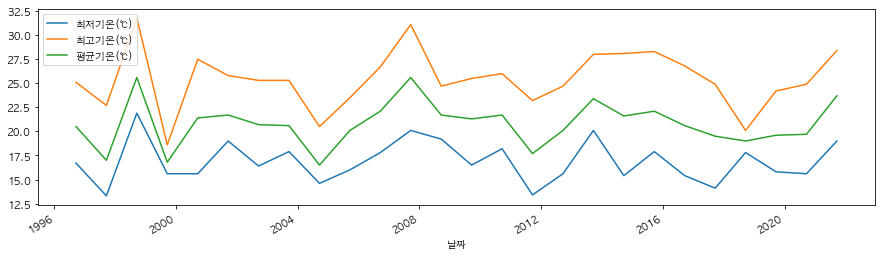

In [13]:
import datetime

birth.날짜 = pd.to_datetime(birth.날짜)
birth.set_index('날짜', inplace=True)

# birth
birth[['최저기온(℃)','최고기온(℃)','평균기온(℃)']].plot(figsize=(15,4))
plt.show()

### 지금까지의 최고 기온을 확인
- Assumption 1 : 최고기온이 높은날이 평균기온 높은 날과 같은지 분석
- Assumption 2 : 평균기온이 높으면 최고기온이 영향을 받는가?
- Assumption 3 : 최고기온이 높으면 최저기온은 어떤 영향을 가지고 있는가?
- Assumption 4 : 최저기온이 낮으면 최고기온도 낮은가?
- Assumption 5 : 최저기온이 낮으면 최고기온의 영향은 어떤지 분석
- Assumption 6 : 최저기온이 낮으면 평균기온도 낮은가? => 어떤 관계가 있는가? => 관계성 분석
- Assumption 7 : 일교차가 가장 큰 날은 어느 날인가?
- Assumption 8 : 일교차가 크게 발생한 년도는 언제인가?

In [19]:
maxtemp = df.iloc[[df['최고기온(℃)'].idxmax()]]
maxtemp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
7985,2018-08-01,108,33.6,27.8,39.6


In [21]:
df.iloc[[df['평균기온(℃)'].idxmax()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
7986,2018-08-02,108,33.7,30.3,37.9


In [20]:
mixtemp = df.iloc[[df['최저기온(℃)'].idxmax()]]
mixtemp

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
7986,2018-08-02,108,33.7,30.3,37.9


In [22]:
df.iloc[[df['최고기온(℃)'].idxmin()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
1578,2001-01-15,108,-15.5,-18.6,-12.4


In [23]:
df.iloc[[df['평균기온(℃)'].idxmin()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
1578,2001-01-15,108,-15.5,-18.6,-12.4


In [24]:
df.iloc[[df['최저기온(℃)'].idxmin()]]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
1578,2001-01-15,108,-15.5,-18.6,-12.4


### 아래 코드로 년도, 10년 단위 그룹, 월, 계절, 열(column)을 추가

- Assumption : 10년 단위 기간의 분석을 통해서 데이터를 관찰한 결과를 분석하기
- Assumption : 10년 단위 기간의 기온은 어떤 변화를 가지는가?
- Assumption : 10년간 서울의 대기오염 및 지구온난화 영향으로 기온의 변화가 있는가?

In [43]:
# 방법1
df1 = df.copy()
# 날짜를 잘라서 년도만 가져오기
df1['년도'] = df1['날짜'].str.slice(0,4).astype(int)
# 10년 단위 그룹으로 나누기
df1['그룹'] = df1['년도'] // 10*10
# 월 추가
df1['월'] = df1['날짜'].str.slice(5,7).astype(int)
# 월을 계절로 바꾸기, 0:겨울, 1:봄, 2:여름, 3:가을
df1['계절'] = (df1['월']//3)%4
df1

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),년도,그룹,월,계절
0,1996-09-20,108,20.5,16.7,25.1,1996,1990,9,3
1,1996-09-21,108,18.6,11.6,25.6,1996,1990,9,3
2,1996-09-22,108,19.4,12.8,26.4,1996,1990,9,3
3,1996-09-23,108,21.3,16.4,27.0,1996,1990,9,3
4,1996-09-24,108,22.9,19.9,27.1,1996,1990,9,3
...,...,...,...,...,...,...,...,...,...
9177,2021-11-05,108,13.0,7.8,20.2,2021,2020,11,3
9178,2021-11-06,108,14.1,8.8,21.3,2021,2020,11,3
9179,2021-11-07,108,15.3,9.7,21.3,2021,2020,11,3
9180,2021-11-08,108,8.6,4.5,15.5,2021,2020,11,3


In [34]:
# 방법2
df1 = df.copy()
df1.날짜 = pd.to_datetime(df1.날짜)
df1['월'] = df1.날짜.dt.month
df1['계절'] = pd.cut(df1.월,bins=[0,2,5,8,11,14],labels=['겨울','봄','여름','가을','겨울'], ordered=False)
df1['그룹'] = df1.날짜.dt.year//10*10
df1.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),월,계절,그룹
0,1996-09-20,108,20.5,16.7,25.1,9,가을,1990
1,1996-09-21,108,18.6,11.6,25.6,9,가을,1990
2,1996-09-22,108,19.4,12.8,26.4,9,가을,1990
3,1996-09-23,108,21.3,16.4,27.0,9,가을,1990
4,1996-09-24,108,22.9,19.9,27.1,9,가을,1990


<AxesSubplot:title={'center':'최고기온(℃)'}, xlabel='그룹'>

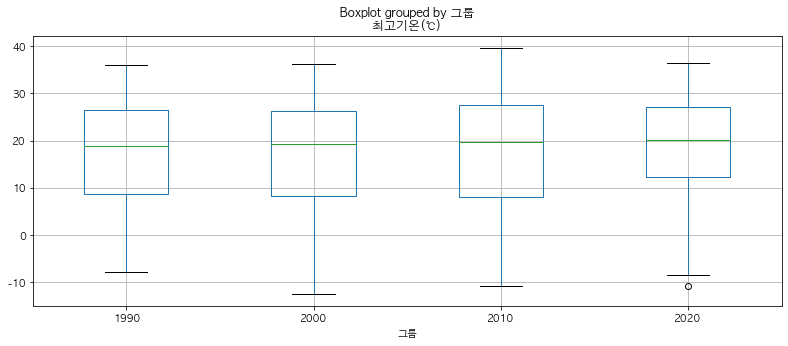

In [41]:
df1.boxplot(column="최고기온(℃)",by='그룹',figsize=(13,5))

- 분석
- 1) 1990년 평균값이 낮았다. 18도 정도로 관측되었으며, 2000년, 2010년, 2020년 대비 약 1~2도의 편차를 보였다.
- 2) 데이터 분석결과, 1990년대의 대기상태와 대기오염 상태가 상대적으로 덜하고 2000년부터 평균 온도가 상승.
- 3) 2020년대 기온 이상치가 발견됨

<AxesSubplot:title={'center':'최고기온(℃)'}, xlabel='월'>

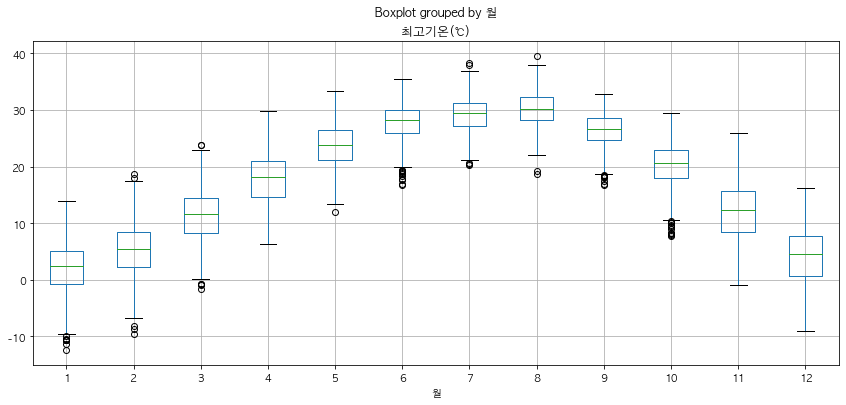

In [44]:
df1.boxplot(column='최고기온(℃)',by='월',figsize=(14,6))

- 분석 결과
- 1) 월간 기온 데이터 분석결과 4월과 12월은 기온에 이상치가 발견되지 않는다. 기온이 상대적으로 안정적으로 관측되고 있다.
- 2) 서울지역은 여름 기온의 최고기온의 일정함이 관측된다.
- 3) 1월, 6월, 9월, 10월에는 최고기온의 이상치가 낮게 많이 발생했다
- 4) 8월의 평균값이 가장 높다. 가장 더운 여름인것 같다.
- 5) 1월의 평균값이 가장 낮다. 가장 추운 겨울인것 같다.
- 6) 

In [52]:
df1

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),년도,그룹,월,계절,일교차
0,1996-09-20,108,20.5,16.7,25.1,1996,1990,9,3,8.4
1,1996-09-21,108,18.6,11.6,25.6,1996,1990,9,3,14.0
2,1996-09-22,108,19.4,12.8,26.4,1996,1990,9,3,13.6
3,1996-09-23,108,21.3,16.4,27.0,1996,1990,9,3,10.6
4,1996-09-24,108,22.9,19.9,27.1,1996,1990,9,3,7.2
...,...,...,...,...,...,...,...,...,...,...
9177,2021-11-05,108,13.0,7.8,20.2,2021,2020,11,3,12.4
9178,2021-11-06,108,14.1,8.8,21.3,2021,2020,11,3,12.5
9179,2021-11-07,108,15.3,9.7,21.3,2021,2020,11,3,11.6
9180,2021-11-08,108,8.6,4.5,15.5,2021,2020,11,3,11.0


<AxesSubplot:title={'center':'일교차'}, xlabel='월'>

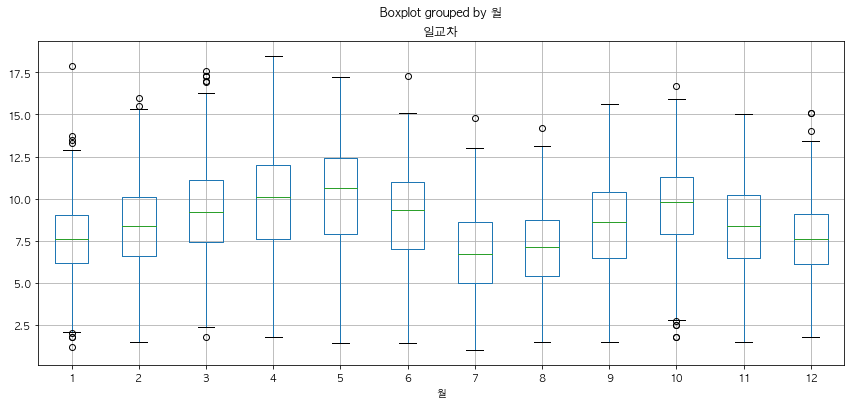

In [48]:
df1['일교차'] = df1['최고기온(℃)'] - df1['최저기온(℃)']
df1.boxplot(column='일교차',by='월',figsize=(14,6))

<AxesSubplot:xlabel='그룹', ylabel='월'>

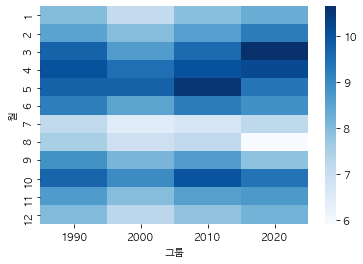

In [54]:
pivot_df = df1.pivot_table('일교차','월','그룹')
sns.heatmap(pivot_df,cmap='Blues')

- 분석 결과
- 1) 4월, 5월 달의 일교차가 가장 크고 이상치도 발견되지 않았다.
- 2) 히트맵 분석 결과 7월, 8월의 일교차가 가장 적다.